<a href="https://colab.research.google.com/github/NeuronsUII/Pathologies_ArtDental_n/blob/main/Kotov%20Alexander/09_Show_Extracted_Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import requests
from urllib.parse import urlencode
import shutil
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Загружаем zip-архив с извлеченными тензорами с Яндекс диска в папку content
# имя архива: ID (например, К536.zip)
ID_CODE = 'К536'   # ID
ORIG_PATH     = 'ORIG'   # папка с извлеченными тензорами с левым и правым суставами (без преобразований: оригинальный размер, цветовая палитра)
SCALED_PATH   = 'SCALED' # папка с смасштабированными тензорами в grayscale (0..255) размером 40х56х77
filename = ID_CODE + '.zip' # имя архива
# Получаем загрузочную ссылку
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/eU6vQ2wASSFaaA'  # ссылка на файл (архив) на Яндекс диске
final_url = base_url + urlencode(dict(public_key=public_key))
# запрос ссылки на скачивание
response = requests.get(final_url)
download_url = response.json()['href']
# Загружаем файл и сохраняем его в папку content
download_response = requests.get(download_url)
with open(filename, 'wb') as f:
    f.write(download_response.content) # сохраняем файл в папку content на google
if os.path.exists(ORIG_PATH): # если папка уже существует, удалим ее со всем содержимым
    shutil.rmtree(ORIG_PATH)
if os.path.exists(SCALED_PATH): # если папка уже существует, удалим ее со всем содержимым
    shutil.rmtree(SCALED_PATH)
# Распаковываем архив (zip-архив содержит папку crop_img_joint внутри которой png-файлы)
!unzip -o -q {filename}
print(f'Размер архива ({filename}):', str(round(os.path.getsize(filename) / (1024 * 1024) , 2)), 'Мб')
# Удаляем файл архива, он нам больше не нужен для работы
os.remove(filename)

Размер архива (К536.zip): 9.04 Мб


In [ ]:
# Загрузка тензоров для примера
orig_tensor = np.load('/content/' + ORIG_PATH + '/ЛК536.npy')
scaled_tensor = np.load('/content/' + SCALED_PATH + '/ЛК536.npy')
print('Размер тензора (orig):', orig_tensor.shape, type(orig_tensor[0,0,0]))
print('Размер тензора (scaled):', scaled_tensor.shape, type(scaled_tensor[0,0,0]))

Размер тензора (orig): (102, 143, 196) <class 'numpy.int16'>
Размер тензора (scaled): (40, 56, 77) <class 'numpy.uint8'>


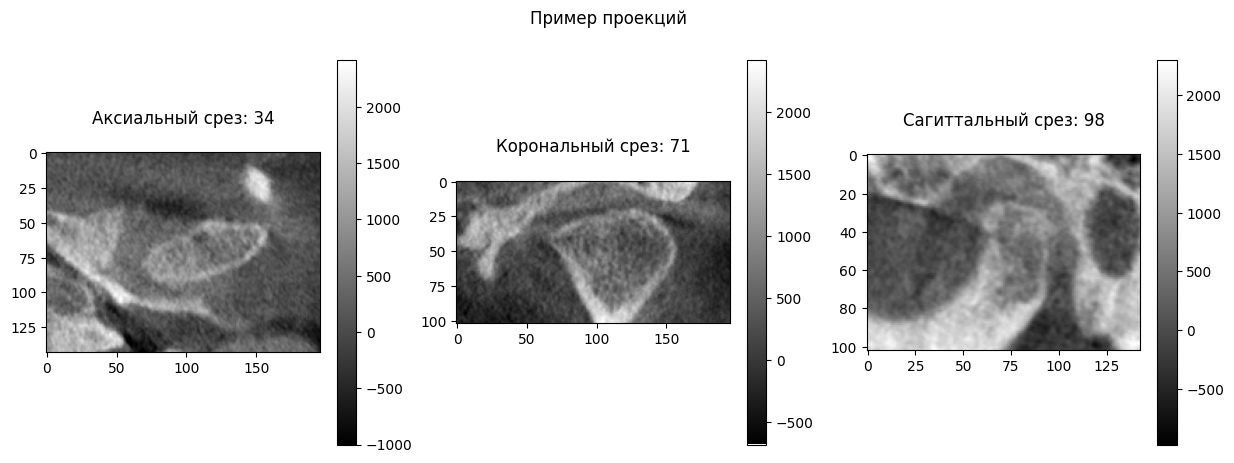

In [ ]:
# Визуализация "оригинального" тензора с левым суставом в трех проекциях
# Выведем из numpy-массива проекции
# Определим номера срезов (подбор вручную)
axial_slice_number    = orig_tensor.shape[0] // 3
coronal_slice_number  = orig_tensor.shape[1] // 2
sagittal_slice_number = orig_tensor.shape[2] // 2

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# аксиальный срез
axes[0].set_title(f"Аксиальный срез: {axial_slice_number}\n")
im0 = axes[0].imshow(orig_tensor[axial_slice_number,:,:], cmap='gray')
# корональный срез
axes[1].set_title(f"Корональный срез: {coronal_slice_number}\n")
im1 = axes[1].imshow(orig_tensor[:,coronal_slice_number,:], cmap='gray')
# сагиттальный срез
axes[2].set_title(f"Сагиттальный срез: {sagittal_slice_number}\n")
im2 = axes[2].imshow(orig_tensor[:,:,sagittal_slice_number], cmap='gray')
fig.colorbar(im0, ax=axes[0])
fig.colorbar(im1, ax=axes[1])
fig.colorbar(im2, ax=axes[2])
plt.suptitle('Пример проекций')
plt.show()

In [ ]:
# Визуализация "смасштабированного" тензора с левым суставом в 3D
scaled_tensor = np.load('/content/' + SCALED_PATH + '/ЛК536.npy')
scaled_tensor = np.flip(scaled_tensor, axis=0) # отзеркалим по вертикали
x, y, z = np.meshgrid(np.arange(scaled_tensor.shape[0]),
                      np.arange(scaled_tensor.shape[1]),
                      np.arange(scaled_tensor.shape[2]), indexing='ij')
# Нормализация значений в тензоре к диапазону от 0 до 1
scaled_tensor_normalized = scaled_tensor.astype(float) / 255.0
# Создание трехмерного графика
fig = go.Figure(data=go.Volume(
    x=z.flatten(),
    y=y.flatten(),
    z=x.flatten(),
    value = scaled_tensor_normalized.flatten(),
    isomin=0,  # Минимальное значение для цветовой шкалы
    isomax=1,  # Максимальное значение для цветовой шкалы
    opacity=0.15,  # Прозрачность
    surface_count=35,  # Количество поверхностей в визуализации
    colorscale= 'gray'))  # Цветовая шкала
scaled_tensor = np.flip(scaled_tensor, axis=0)

In [ ]:
# Отображение в 3D
fig.show()

In [ ]:
# аксиальные срезы
for axial_slice_number in range(scaled_tensor.shape[0]):
    print('Слой:', axial_slice_number)
    plt.figure(figsize=(3, 3))
    plt.imshow(scaled_tensor[axial_slice_number,:,:], cmap='gray')
    plt.show()

In [ ]:
# корональные срезы
for coronal_slice_number in range(scaled_tensor.shape[1]):
    print('Слой:', coronal_slice_number)
    plt.figure(figsize=(3, 3))
    plt.imshow(scaled_tensor[:,coronal_slice_number,:], cmap='gray')
    plt.show()

In [ ]:
# сагиттальные срезы
for sagittal_slice_number in range(scaled_tensor.shape[2]):
    print('Слой:', sagittal_slice_number)
    plt.figure(figsize=(3, 3))
    plt.imshow(scaled_tensor[:,:,sagittal_slice_number], cmap='gray')
    plt.show()